   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


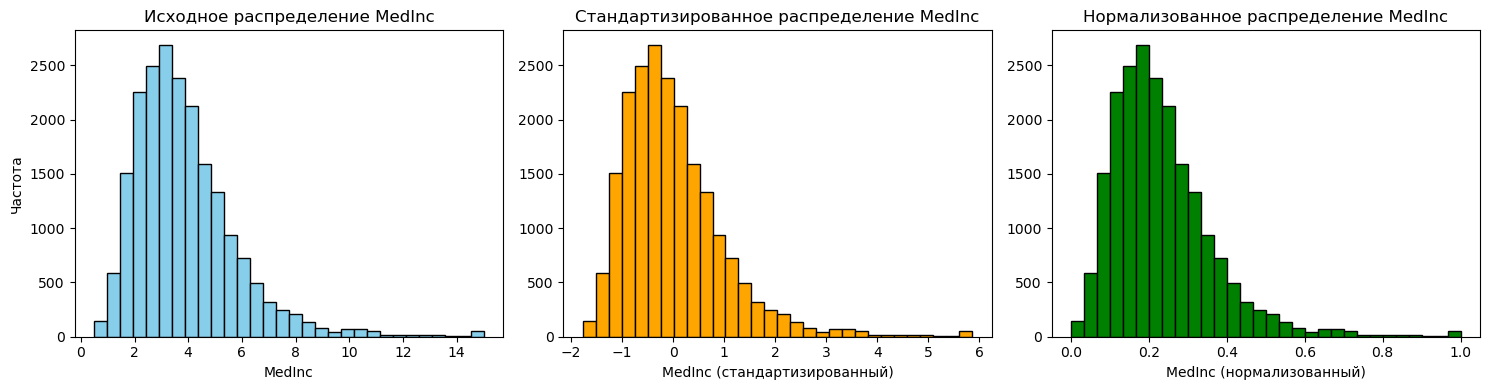


- Исходное распределение показывает реальные значения признака MedInc.
- Стандартизация (StandardScaler) приводит данные к среднему 0 и стандартному отклонению 1,
  поэтому гистограмма центрирована около 0 с симметричным распределением.
- Нормализация (MinMaxScaler) масштабирует значения в диапазон [0, 1],
  поэтому гистограмма сдвинута и сжата в этом интервале.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#  Загрузка данных с помощью fetch_california_housing
data = fetch_california_housing(as_frame=True)
df = data.frame  

#  первые строки для ознакомления
print(df.head())

scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Копия таблицы для нормализации
df_minmax = df.copy()

# Стандартизация всех признаков
df_standard = pd.DataFrame(scaler_standard.fit_transform(df), columns=df.columns)

# Нормализация всех признаков (на копии)
df_minmax[df.columns] = scaler_minmax.fit_transform(df_minmax[df.columns])

#  Построение гистограмм для признака MedInc (median income) до и после масштабирования
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.hist(df['MedInc'], bins=30, color='skyblue', edgecolor='black')
plt.title('Исходное распределение MedInc')
plt.xlabel('MedInc')
plt.ylabel('Частота')

plt.subplot(1, 3, 2)
plt.hist(df_standard['MedInc'], bins=30, color='orange', edgecolor='black')
plt.title('Стандартизированное распределение MedInc')
plt.xlabel('MedInc (стандартизированный)')

plt.subplot(1, 3, 3)
plt.hist(df_minmax['MedInc'], bins=30, color='green', edgecolor='black')
plt.title('Нормализованное распределение MedInc')
plt.xlabel('MedInc (нормализованный)')

plt.tight_layout()
plt.show()

#  Сравнение поведения шкал на гистограммах:
print("""
- Исходное распределение показывает реальные значения признака MedInc.
- Стандартизация (StandardScaler) приводит данные к среднему 0 и стандартному отклонению 1,
  поэтому гистограмма центрирована около 0 с симметричным распределением.
- Нормализация (MinMaxScaler) масштабирует значения в диапазон [0, 1],
  поэтому гистограмма сдвинута и сжата в этом интервале.
""")